In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('ordinalTrans.csv')

In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
def rmsle(h, y):
   """
   Compute the Root Mean Squared Log Error for hypthesis h and targets y
   
   Args:
       h - numpy array containing predictions with shape (n_samples, n_targets)
       y - numpy array containing targets with shape (n_samples, n_targets)
   """
   return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [7]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
randomForest = RandomForestRegressor(n_estimators = 100, random_state=0)
randomForest.fit(X_train,y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [8]:
rand_pred = randomForest.predict(X_test)
rand = sum((y_test - rand_pred)**2)
rmsle(rand_pred,y_test)
rand

184921578230.42432

In [8]:
# Creating a multilinear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [396]:
y_pred = regressor.predict(X_test)
rss1 = sum((y_pred - y_test)**2)
rmsle(y_pred,y_test)

0.1620840290739512

In [1]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(y,X.loc[:,['const', 'MSZoning_C (all)', 'MSZoning_FV', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_RRAe', 'Condition2_PosN', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior1st_MetalSd', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_Wood', 'Heating_OthW', 'GarageType_2Types', 'GarageType_BuiltIn', 'GarageType_No', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Abnorml', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'ScreenPorch', 'Pool', 'PoolQC']]).fit()
print(regressor_OLS.summary())
print(max(regressor_OLS.pvalues))

NameError: name 'y' is not defined

In [207]:
X.loc[:,['const', 'MSZoning_C (all)', 'MSZoning_FV', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_RRAe', 'Condition2_PosN', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior1st_MetalSd', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_Wood', 'Heating_OthW', 'GarageType_2Types', 'GarageType_BuiltIn', 'GarageType_No', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Abnorml', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'ScreenPorch', 'Pool', 'PoolQC']]

In [371]:
X_opt = X[['const', 'MSZoning_C (all)', 'MSZoning_FV', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_RRAe', 'Condition2_PosN', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior1st_MetalSd', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_Wood', 'Heating_OthW', 'GarageType_2Types', 'GarageType_BuiltIn', 'GarageType_No', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Abnorml', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'ScreenPorch', 'Pool', 'PoolQC']]

In [373]:
from sklearn.cross_validation import train_test_split
Xopt_train, Xopt_test, yopt_train, yopt_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0)

In [374]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
Forest = RandomForestRegressor(n_estimators = 100, random_state=0)
Forest.fit(Xopt_train,yopt_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [397]:
forest_pred = Forest.predict(Xopt_test)
rand1 = sum((yopt_test - forest_pred)**2)
rmsle(forest_pred,yopt_test)


0.16280336080873528

In [393]:
from sklearn.linear_model import LinearRegression
regress = LinearRegression()
regress.fit(Xopt_train,yopt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [388]:
yopt_pred = regress.predict(Xopt_test)

In [390]:
rss1= sum((yopt_pred - yopt_test)**2)

141452470391.47833

In [394]:
rmsle(yopt_pred,yopt_test)

0.13669235137820768

In [418]:
from sklearn import linear_model
alpha_ridge1 = 10**np.linspace(5, -2, 100)
ridge1= linear_model.RidgeCV(alphas=alpha_ridge1, cv=20).fit(Xopt_train,np.ravel(yopt_train))

In [420]:
#ridgereg = Ridge(alpha=ridge1.alpha_,normalize=True)
#ridgereg.fit(X_train,np.ravel(y_train))
ridge_pred = ridge1.predict(Xopt_test)

In [421]:
ridge1.score(X_train, y_train)

0.9227223725359329

In [422]:
rmsle(ridge_pred,yopt_test)

0.135833328579317

In [415]:
from sklearn import linear_model
alphas_lasso = np.logspace(-2, 4, 100)
lasso2= linear_model.LassoCV(n_alphas=100, alphas=alphas_lasso, cv=20, random_state=0, max_iter=500000).fit(Xopt_train,np.ravel(yopt_train))

In [416]:
lasso_pred = lasso2.predict(Xopt_test)

In [417]:
rmsle(lasso_pred,yopt_test)

0.13661240644576325

In [424]:
lasso2.alpha_

1.0

In [65]:
month_mean = data.groupby('YrSold').mean().SalePrice
month_mean


YrSold
2006    180819.006410
2007    180996.978261
2008    176619.150000
2009    176789.823353
2010    175409.786127
Name: SalePrice, dtype: float64

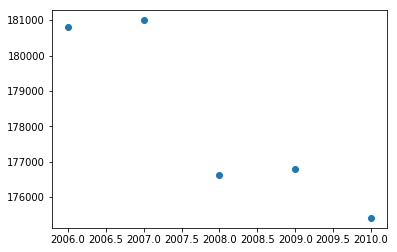

In [66]:

plt.scatter(x= month_mean.index, y = month_mean)
plt.show()

In [ ]:
pd.to_datetime(df[['year', 'month', 'day']])

In [35]:
pd.to_datetime(data[['YrSold','MoSold']])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [46]:
data.time =pd.to_datetime(dict(year=data.YrSold, month=data.MoSold, day=data.DaySold))

In [48]:
data

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,ScreenPorch,Pool,PoolQC,Shed,MiscVal,MoSold,YrSold,SalePrice,time,DaySold
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,208500,2008-02-01,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,2007,181500,2007-05-01,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,2008,223500,2008-09-01,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2,2006,140000,2006-02-01,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,12,2008,250000,2008-12-01,1
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,700,10,2009,143000,2009-10-01,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,2007,307000,2007-08-01,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,350,11,2009,200000,2009-11-01,1
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,4,2008,129900,2008-04-01,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2008,118000,2008-01-01,1


In [44]:
data['DaySold'] = [1]*int(len(data.MoSold))
data

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,ScreenPorch,Pool,PoolQC,Shed,MiscVal,MoSold,YrSold,SalePrice,time,DaySold
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,208500,2010,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,2007,181500,2012,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,2008,223500,2017,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2,2006,140000,2008,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,12,2008,250000,2020,1
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,700,10,2009,143000,2019,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,2007,307000,2015,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,350,11,2009,200000,2020,1
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,4,2008,129900,2012,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2008,118000,2009,1
